<a href="https://colab.research.google.com/github/rezjaq/MachLearn/blob/main/RecurrentNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Praktikum 1**

In [ ]:
# Import Packages
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Setup
tfds.disable_progress_bar()

def plot_graphs(history, metric="accuracy"):
  plt.plot(history.history[metric])
  plt.plot(history.history["val_" + metric], "")
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, "val_" + metric])

In [ ]:
# Setup input pipeline
dataset, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

train_dataset.element_spec

for example, label in train_dataset.take(1):
  print("text: ", example.numpy())
  print("label: ", label.numpy())

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for example, label in train_dataset.take(1):
  print("texts: ", example.numpy()[:3])
  print()
  print("labels: ", label.numpy()[:3])

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0
texts:  [b'This "film" attempts to follow the genre of low budget, hand-held camera flicks that have proved to be very effecti

In [ ]:
# Buat Teks Encoder
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

encoded_example = encoder(example)[:3].numpy()
encoded_example

for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'This "film" attempts to follow the genre of low budget, hand-held camera flicks that have proved to be very effective and successful.<br /><br />This one, fails, and HOW.<br /><br />It\'s amazing how many so called "awards" this piece of garbage has got plastered on the cover..... it makes you wonder what these critics were on when they actually submitted this....<br /><br />Words fail to describe just how absolutely appalling this movie really is. Seriously, it\'s THAT BAD.<br /><br />I watched it in 20 minutes flat, on almost continual fast forward.<br /><br />From rubbish lighting to dreadful directing, grainy visuals to muffled sound, and of course not forgetting the ABYSMAL acting, this was one completely and utterly pathetic piece of so-called film making.<br /><br />It seriously, has NO redeeming qualities - whatsoever. Save your cash and watch a decent low budget horror flick, there are plenty out there - Dead End, The Blair Witch, REC, to name but a few.<br /><br 

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

print([layer.supports_masking for layer in model.layers])

# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(tf.constant([sample_text]))
print(predictions[0])

# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(tf.constant([sample_text, padding]))
print(predictions[0])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

[False, True, True, True, True]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[-0.00301236]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
[-0.00301237]


In [ ]:
# Train Model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.5184 - loss: 0.6796 - val_accuracy: 0.7693 - val_loss: 0.4598
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.7742 - loss: 0.4617 - val_accuracy: 0.8422 - val_loss: 0.3913
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.8405 - loss: 0.3737 - val_accuracy: 0.8531 - val_loss: 0.3274
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 738s 2s/step - accuracy: 0.8523 - loss: 0.3435 - val_accuracy: 0.8344 - val_loss: 0.3514
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 747s 2s/step - accuracy: 0.8620 - loss: 0.3279 - val_accuracy: 0.8599 - val_loss: 0.3265
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.8695 - loss: 0.3148 - val_accuracy: 0.8281 - val_loss: 0.3527
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.8657 - loss: 0.3178 - val_accuracy: 0.8583 - val_loss: 0.3177
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 743s 2s/step - accuracy: 0.8701 - loss: 0.3101 - val_accu

391/391 ━━━━━━━━━━━━━━━━━━━━ 157s 401ms/step - accuracy: 0.8581 - loss: 0.3159
Test Loss: 0.31520316004753113
Test Accuracy: 0.8590800166130066


(0.0, 0.6434319034218788)

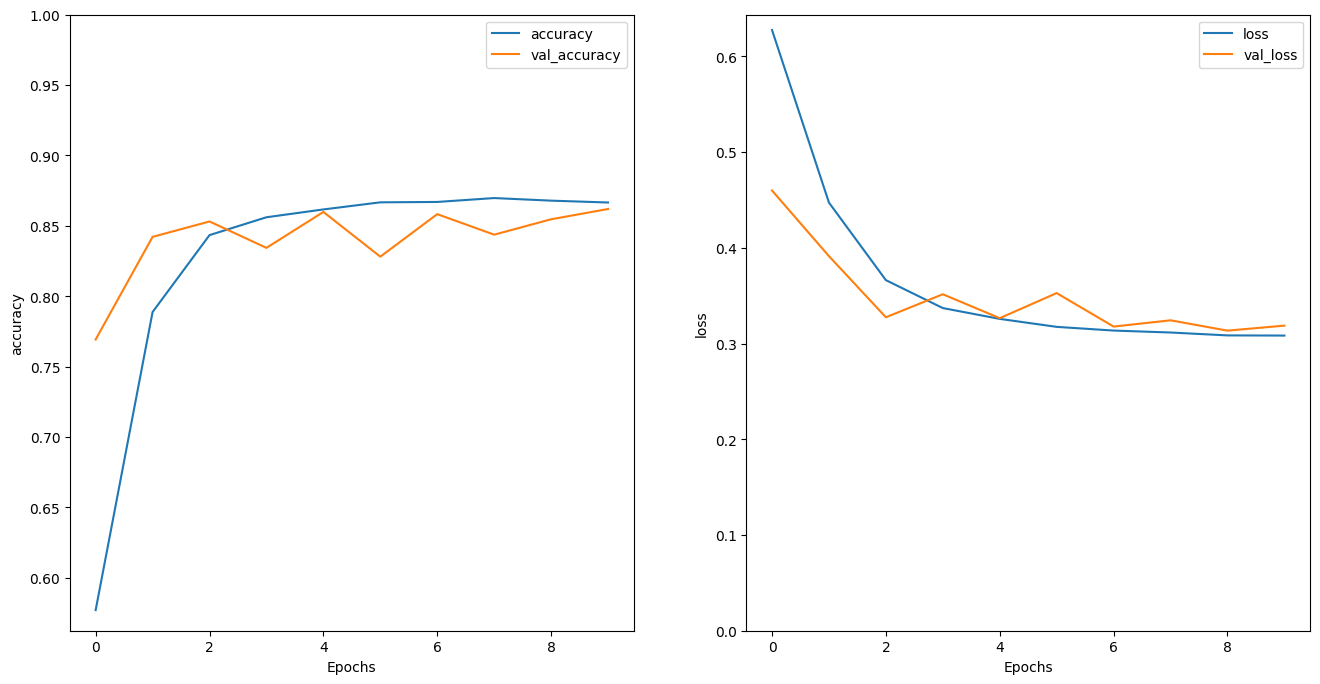

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
# Predict new sentence
# sample_text = ('The movie was cool. The animation and the graphics '
#                'were out of this world. I would recommend this movie.')
# predictions = model.predict(tf.constant([sample_text]))

# Stack two or more LSTM layers
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1363s 3s/step - accuracy: 0.5090 - loss: 0.6820 - val_accuracy: 0.8104 - val_loss: 0.4415
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1401s 3s/step - accuracy: 0.8151 - loss: 0.4138 - val_accuracy: 0.8349 - val_loss: 0.3474
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1357s 3s/step - accuracy: 0.8463 - loss: 0.3624 - val_accuracy: 0.8589 - val_loss: 0.3157
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1407s 3s/step - accuracy: 0.8563 - loss: 0.3358 - val_accuracy: 0.8615 - val_loss: 0.3337
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1368s 3s/step - accuracy: 0.8656 - loss: 0.3189 - val_accuracy: 0.8505 - val_loss: 0.3211
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1321s 3s/step - accuracy: 0.8663 - loss: 0.3214 - val_accuracy: 0.8365 - val_loss: 0.3517
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1309s 3s/step - accuracy: 0.8683 - loss: 0.3087 - val_accuracy: 0.8714 - val_loss: 0.3317
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1306s 3s/step - accuracy: 0.8721 - loss: 0.3105 - 

391/391 ━━━━━━━━━━━━━━━━━━━━ 290s 742ms/step - accuracy: 0.8613 - loss: 0.3119
Test Loss: 0.3107086718082428
Test Accuracy: 0.860480010509491
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[-2.127056]]


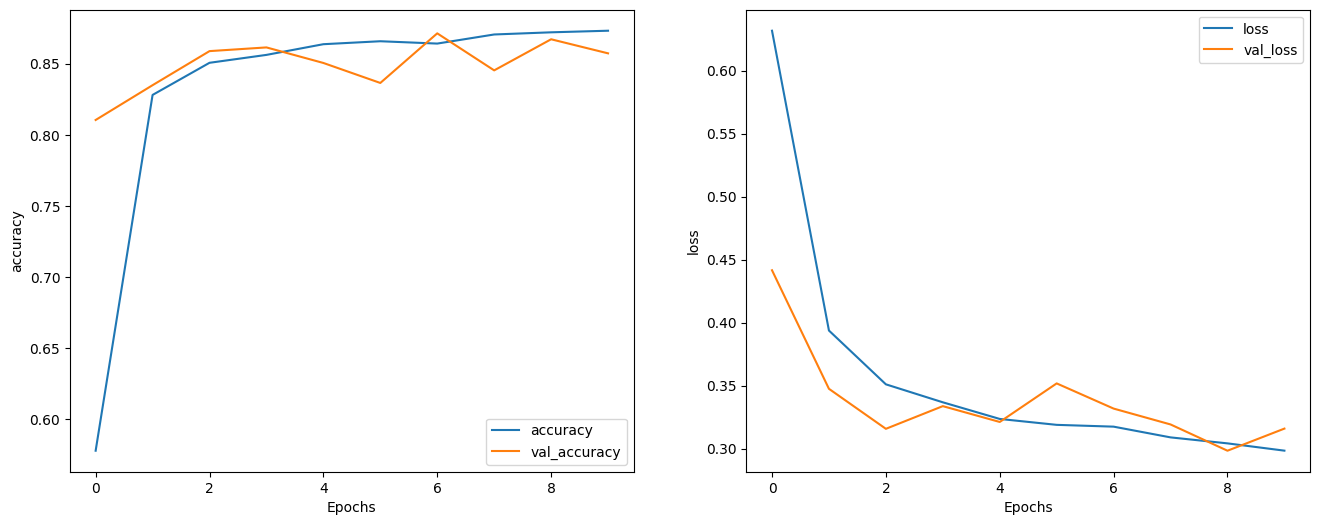

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(tf.constant([sample_text]))
print(predictions)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

## **Praktikum 2**

### **Setup**

In [19]:
# Setup
import tensorflow as tf
import numpy as np
import os
import time

In [20]:
# Dataset
path_to_file = tf.keras.utils.get_file('shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [22]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [23]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


### **Olah Teks**

In [24]:
example_texts = ['abcdefg', 'xyz']
chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [25]:
ids_from_chars = tf.keras.layers.StringLookup(
vocabulary=list(vocab), mask_token=None)

In [26]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [27]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [28]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [29]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

In [30]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

### **Prediksi**

In [31]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [32]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [33]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [34]:
seq_length = 100

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [35]:
for seq in sequences.take(5):
    print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [36]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [37]:
dataset = sequences.map(split_input_target)

for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


### **Membuat Batch Training**

In [38]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

### **Buat Model**

In [39]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [40]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__()
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      batch_size = tf.shape(inputs)[0]
      states = self.gru.get_initial_state(batch_size=batch_size)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x


In [41]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

### **Uji Model**

In [42]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [43]:
model.summary()

sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

sampled_indices

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 100, 256)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ((64, 100, 1024), (64,      │       3,938,304 │
│                                      │ 1024))                      │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 100, 66)               │          67,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,022,850 (15.35 MB)

 Trainable params: 4,022,850 (15.35 MB)

 Non-trainable params: 0 (0.00 B)

array([11, 34, 27, 56, 36, 19, 36, 59,  4, 54, 36,  2, 63,  6, 21, 28,  2,
       15, 56, 18, 15, 35,  6, 65, 13, 30,  2, 28, 20, 27, 29, 32, 47, 62,
       50,  5, 54, 55, 19, 19, 10, 22, 34, 38, 53, 10, 38,  2, 23, 35,  5,
       40, 27, 53, 48, 18, 11,  1, 46, 36, 51, 45, 26, 36, 41, 11, 33, 18,
       24, 47, 18, 59,  5, 22, 29, 13,  3, 46, 65,  9, 49,  1, 19, 19, 47,
       21, 56, 37, 23,  3, 28, 25, 24, 37, 16, 64, 23,  8, 45, 50])

In [44]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b"e opposers: Tarquin's self he met,\nAnd struck him on his knee: in that day's feats,\nWhen he might ac"

Next Char Predictions:
 b":UNqWFWt$oW x'HO BqEBV'z?Q OGNPShwk&opFF3IUYn3Y JV&aNniE:\ngWlfMWb:TEKhEt&IP?!gz.j\nFFhHqXJ!OLKXCyJ-fk"


### **Train Model**

In [45]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.1902537, shape=(), dtype=float32)


In [46]:
tf.exp(example_batch_mean_loss).numpy()

66.03954

In [47]:
model.compile(optimizer='adam', loss=loss)

In [48]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [49]:
EPOCHS = 20

history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
 12/172 ━━━━━━━━━━━━━━━━━━━━ 15:18 6s/step - loss: 4.4311

KeyboardInterrupt: 

### **Generate Text**

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

### **Ekspor Model Generator**

In [ ]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

## **Tugas**

In [50]:
import tensorflow as tf
import numpy as np
import os
import time

In [51]:
class CustomTraining(MyModel):
  @tf.function
  def train_step(self, inputs):
      inputs, labels = inputs
      with tf.GradientTape() as tape:
          predictions = self(inputs, training=True)
          loss = self.loss(labels, predictions)
      grads = tape.gradient(loss, model.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, model.trainable_variables))

      return {'loss': loss}

In [52]:
model = CustomTraining(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [53]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [54]:
model.fit(dataset, epochs=1)

172/172 ━━━━━━━━━━━━━━━━━━━━ 995s 6s/step - loss: 2.5055


In [61]:
EPOCHS = 10

mean = tf.metrics.Mean()

checkpoint_prefix = 'training_checkpoints/ckpt_{epoch}.weights.h5'

for epoch in range(EPOCHS):
    start = time.time()

    mean.reset_state()

    for (batch_n, (inp, target)) in enumerate(dataset):
        logs = model.train_step([inp, target])
        mean.update_state(logs['loss'])

        if batch_n % 50 == 0:
            template = f"Epoch {epoch+1} Batch {batch_n} Loss {logs['loss']:.4f}"
            print(template)

    if (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print()
    print(f'Epoch {epoch+1} Loss: {mean.result().numpy():.4f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec')
    print("_"*80)

model.save_weights(checkpoint_prefix.format(epoch=epoch))


Epoch 1 Batch 0 Loss 1.0433
Epoch 1 Batch 50 Loss 1.1205
Epoch 1 Batch 100 Loss 1.0842
Epoch 1 Batch 150 Loss 1.1189

Epoch 1 Loss: 1.0760
Time taken for 1 epoch 941.90 sec
________________________________________________________________________________
Epoch 2 Batch 0 Loss 1.0052
Epoch 2 Batch 50 Loss 1.0249
Epoch 2 Batch 100 Loss 1.0421
Epoch 2 Batch 150 Loss 1.0615

Epoch 2 Loss: 1.0300
Time taken for 1 epoch 928.41 sec
________________________________________________________________________________
Epoch 3 Batch 0 Loss 0.9471
Epoch 3 Batch 50 Loss 0.9684
Epoch 3 Batch 100 Loss 0.9880
Epoch 3 Batch 150 Loss 0.9979

Epoch 3 Loss: 0.9835
Time taken for 1 epoch 953.10 sec
________________________________________________________________________________
Epoch 4 Batch 0 Loss 0.8864
Epoch 4 Batch 50 Loss 0.9337
Epoch 4 Batch 100 Loss 0.9640
Epoch 4 Batch 150 Loss 0.9433

Epoch 4 Loss: 0.9369
Time taken for 1 epoch 981.92 sec
_________________________________________________________________